## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [3]:
X = np.linspace(0,20)

In [4]:
a = -2
b = 1
y = a*X + b

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [5]:
def GradientDes(X, y, alpha, max_number_iter):
    Loss = []
    Theta_0 = []
    Theta_1 = []
    H_theta = []
    
    theta0 = 0
    theta1 = 0
    learning_rate = alpha
    for i in range(max_number_iter): 
        
        h_theta = theta0 + theta1*X
        
        m = len(X)
        
        
        drev_theta0 = (1/m) * sum(h_theta - y)
        drev_theta1 = (1/m) * sum( (h_theta - y)* X)

        theta0 = theta0 - learning_rate*drev_theta0
        theta1 = theta1 - learning_rate*drev_theta1
        
        theta_vector = [drev_theta0, drev_theta1]
        
        gradient = np.linalg.norm(theta_vector)
        
        h_theta = theta0 + theta1*X
        MSE = (1/(2*m))* sum((h_theta - y)**2)
        if i> 0 and abs(MSE-Loss[-1]) < 0.001:
            break
        elif i > 0 and gradient < 0.3:
            break
        else:
            Loss.append(MSE)
            H_theta.append(h_theta)
            Theta_0.append(theta0)
            Theta_1.append(theta1)
        

        
        
        
    return Theta_0, Theta_1, Loss, H_theta, theta0, theta1

#### Try your function with any input parameterss of your choice.

In [6]:
Theta_0, Theta_1, Loss, H_theta, theta0, theta1 = GradientDes(X, y, 0.001, 500)
print(Loss[-1])

0.16770268313644945


#### Calculate r2 score

In [7]:
from sklearn.metrics import r2_score
r2_score(y, H_theta[-1])

0.9975831083900923

#### Plot loss vs. epochs

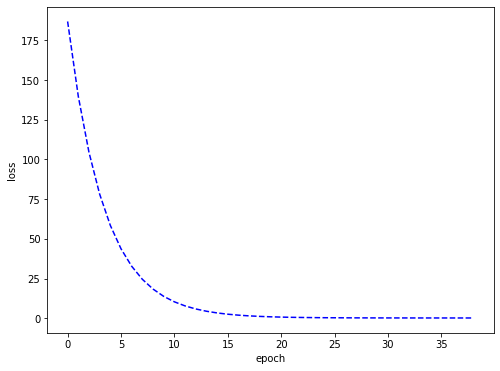

In [8]:
plt.figure(figsize = (8,6))
plt.plot(Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

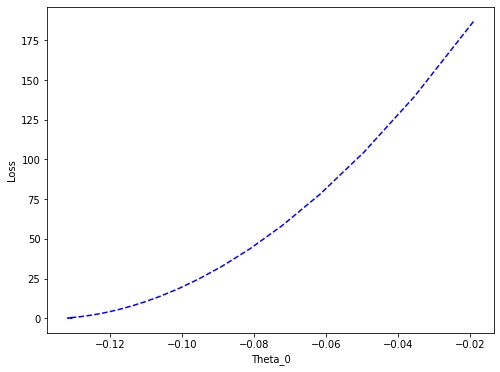

In [9]:
plt.figure(figsize = (8,6))
plt.plot(Theta_0, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.show()

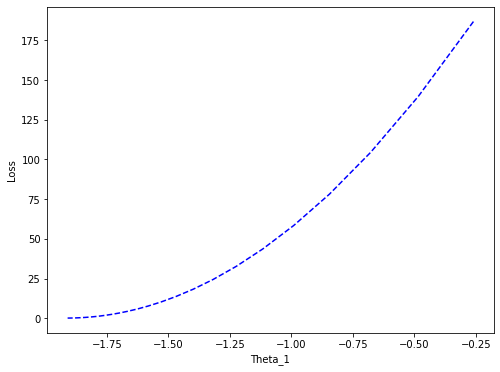

In [10]:
plt.figure(figsize = (8,6))
plt.plot(Theta_1, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.show()

#### Plot all regression lines till converge

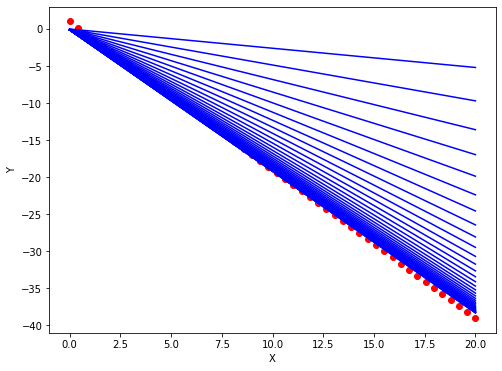

In [11]:
# Plotting all the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
for h_theta in H_theta:
    plt.plot(X, h_theta, color='blue',markerfacecolor='red',
         markersize=10)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### Plot the best regression line

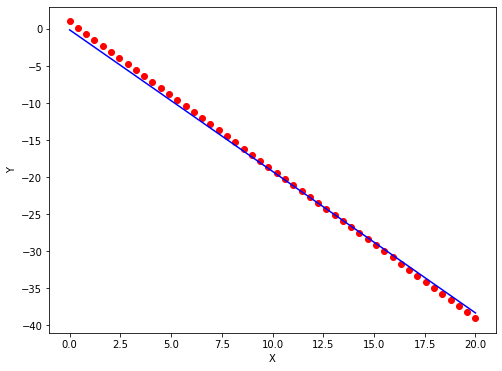

In [12]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
plt.plot(X, H_theta[-1], color='blue',markerfacecolor='red',
         markersize=15)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [13]:
Theta_0, Theta_1, Loss, H_theta, theta0, theta1 = GradientDes(X, y, 0.011, 50)
print(Loss[-1])

0.15801383578548514


In [14]:
r2_score(y, H_theta[-1])

0.9977227417783856

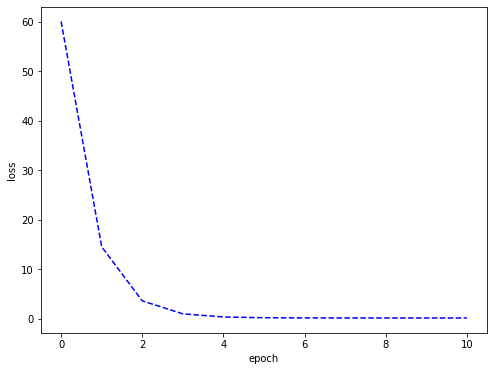

In [15]:
plt.figure(figsize = (8,6))
plt.plot(Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

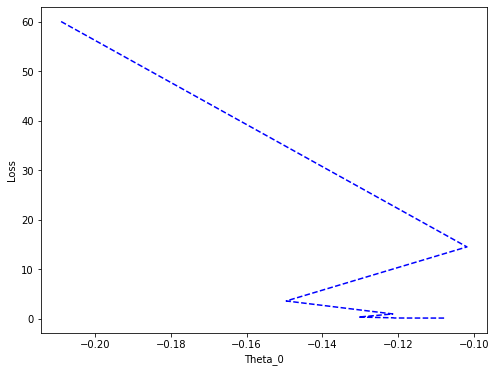

In [16]:
plt.figure(figsize = (8,6))
plt.plot(Theta_0, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.show()

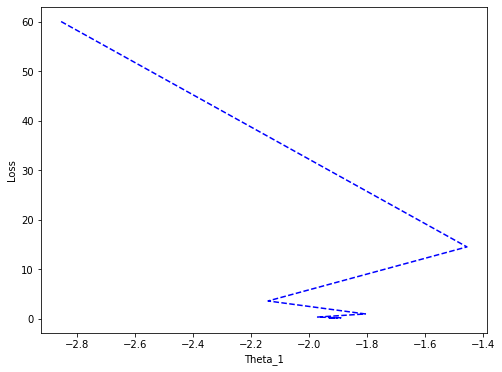

In [17]:
plt.figure(figsize = (8,6))
plt.plot(Theta_1, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.show()

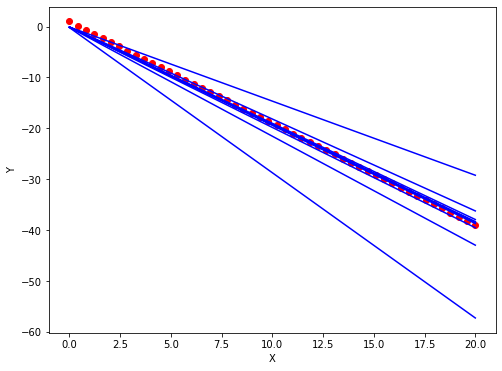

In [18]:
# Plotting all the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
for h_theta in H_theta:
    plt.plot(X, h_theta, color='blue',markerfacecolor='red',
         markersize=10)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

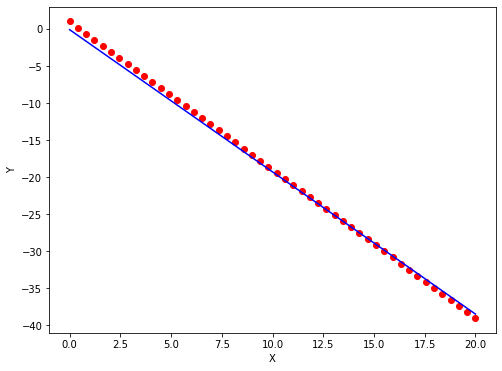

In [19]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
plt.plot(X, H_theta[-1], color='blue',markerfacecolor='red',
         markersize=15)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [20]:
def GradientDes_Mini(X, y, alpha, max_number_iter, batch):
    Loss = [0]
    Theta_0 = [0]
    Theta_1 = [0]
    H_theta = []
    
    theta0 = 0
    theta1 = 0
    learning_rate = alpha
    m = len(X)
    for i in range(max_number_iter): 
        j = 0
        loss_batch = Loss[-1]
        while(j < len(X)-batch):
            X_batch = X[j:j+batch]
            y_batch = y[j:j+batch]
            b = len(X_batch)

            h_theta = theta0 + theta1*X_batch

            drev_theta0 = (1/b) * sum(h_theta - y_batch)
            drev_theta1 = (1/b) * sum( (h_theta - y_batch)* X_batch)

            theta0 = theta0 - learning_rate*drev_theta0
            theta1 = theta1 - learning_rate*drev_theta1
            j += batch
            
            h_theta = theta0 + theta1*X_batch
            MSE = (1/(2*b))* sum((h_theta - y_batch)**2)
            
            Theta_0.append(theta0)
            Theta_1.append(theta1)
            Loss.append(MSE)
            
        h_theta = theta0 + theta1*X 
        H_theta.append(h_theta)
        theta_vector = [drev_theta0, drev_theta1]
        gradient = np.linalg.norm(theta_vector)
        #MSE = (1/(2*m))* sum((h_theta - y)**2)
        if i> 0 and abs(MSE-loss_batch) < 0.001:
            print("iteration ",i)
            break
            
        if i > 0 and gradient < 0.3:
            print("iteration_grad ",i)
            break
            
        
        
        
    return Theta_0, Theta_1, Loss, H_theta, theta0, theta1

In [21]:
Theta_0, Theta_1, Loss, H_theta, theta0, theta1 = GradientDes_Mini(X, y, 0.001, 200, 2)
print(Loss[-1])

iteration  3
0.011093098089691526


In [22]:
len(H_theta)

4

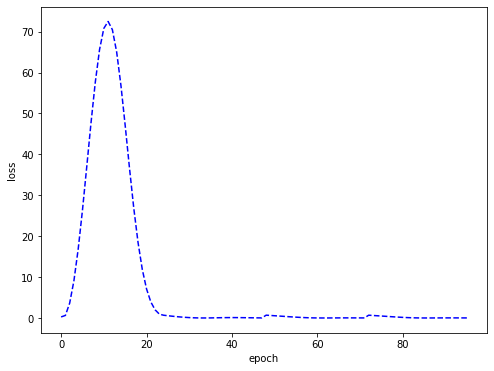

In [23]:
plt.figure(figsize = (8,6))
plt.plot(Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

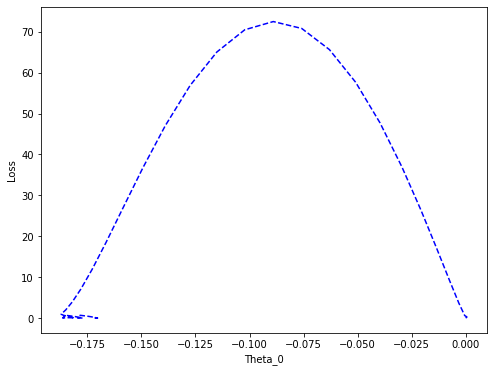

In [23]:
plt.figure(figsize = (8,6))
plt.plot(Theta_0, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.show()

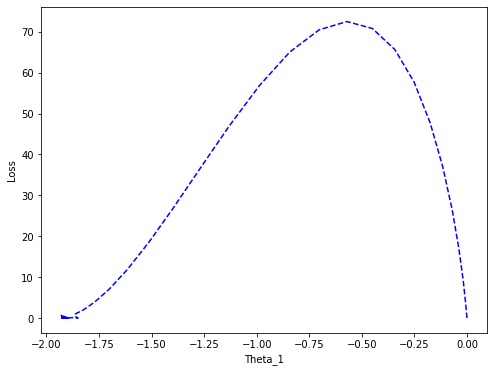

In [24]:
plt.figure(figsize = (8,6))
plt.plot(Theta_1, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.show()

In [25]:
len(H_theta)

4

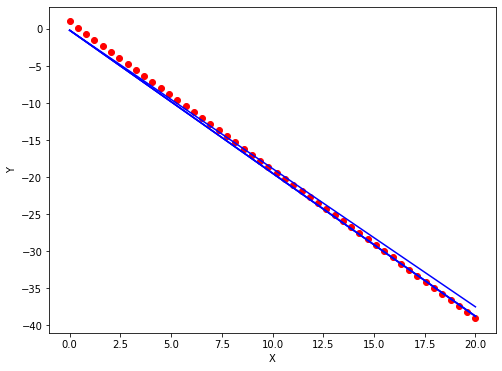

In [26]:
# Plotting all the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
for h_theta in H_theta:
    plt.plot(X, h_theta, color='blue',markerfacecolor='red',
         markersize=10)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

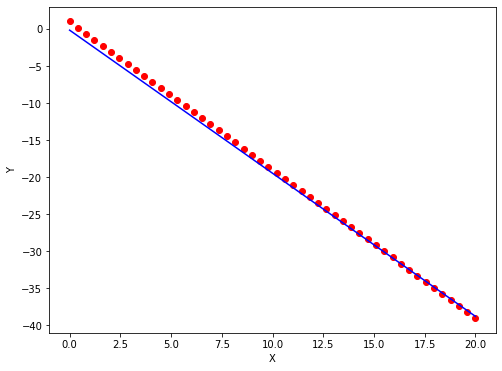

In [27]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
plt.plot(X, H_theta[-1], color='blue',markerfacecolor='red',
         markersize=15)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Shuffling

In [46]:
import random
c = list(zip(X, y))
random.shuffle(c)
X_shuffle, y_shuffle = zip(*c)
X_shuffle = np.array(X_shuffle)
y_shuffle = np.array(y_shuffle)
Theta_0, Theta_1, Loss, H_theta, theta0, theta1 = GradientDes_Mini(X_shuffle, y_shuffle, 0.001, 200, 2)
print(Loss[-1])

iteration  100
0.0831463055328241


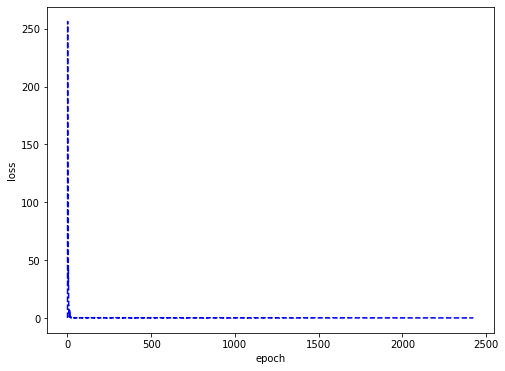

In [47]:
plt.figure(figsize = (8,6))
plt.plot(Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

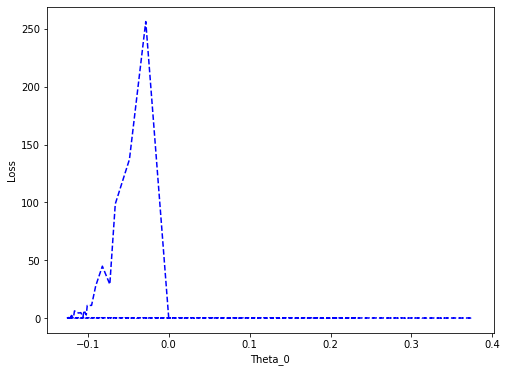

In [48]:
plt.figure(figsize = (8,6))
plt.plot(Theta_0, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.show()

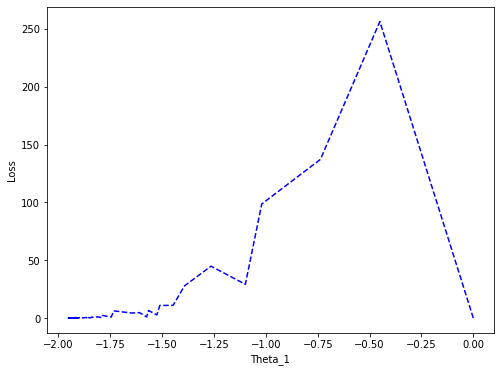

In [49]:
plt.figure(figsize = (8,6))
plt.plot(Theta_1, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.show()

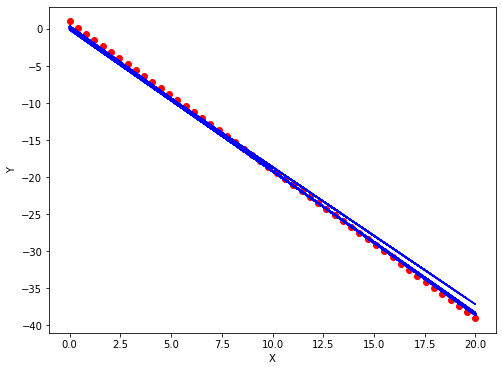

In [53]:
# Plotting all the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_shuffle, y_shuffle, marker='o', color='red')
    
for h_theta in H_theta:
    plt.plot(X_shuffle, h_theta, color='blue',markerfacecolor='red',
         markersize=10)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

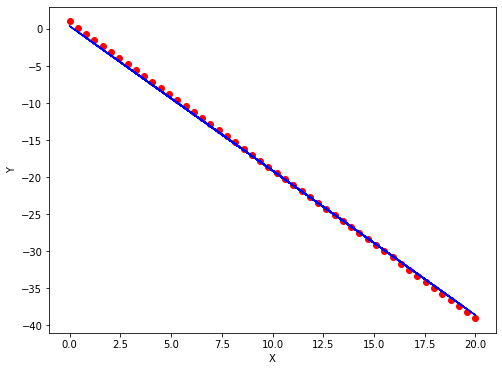

In [55]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_shuffle, y_shuffle, marker='o', color='red')
    
plt.plot(X_shuffle, H_theta[-1], color='blue',markerfacecolor='red',
         markersize=15)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [28]:
def GradientDes_Stoch(X, y, alpha, max_number_iter):
    Loss = [0]
    Theta_0 = [0]
    Theta_1 = [0]
    H_theta = []
    
    theta0 = 0
    theta1 = 0
    learning_rate = alpha
    m = len(X)
    for i in range(max_number_iter): 
        loss_batch = Loss[-1]
        for xi,yi in zip(X,y):
            hi = theta0 + theta1*xi
            drev_theta0 = hi - yi
            drev_theta1 = (hi - yi)* xi

            theta0 = theta0 - learning_rate*drev_theta0
            theta1 = theta1 - learning_rate*drev_theta1
        
            drev_theta0 = hi - yi
            drev_theta1 = (hi - yi)* xi

            theta0 = theta0 - learning_rate*drev_theta0
            theta1 = theta1 - learning_rate*drev_theta1
                        
            h_theta = theta0 + theta1*xi
            Theta_0.append(theta0)
            Theta_1.append(theta1)
            MSE = (h_theta - yi)**2
            Loss.append(MSE)

        h_theta = theta0 + theta1*X
        H_theta.append(h_theta)
        #MSE = (1/(2*m))* sum((h_theta - y)**2)
        theta_vector = [drev_theta0, drev_theta1]
        gradient = np.linalg.norm(theta_vector)
        if i> 0 and (abs(MSE-loss_batch) < 0.001):
            print("iteration ",i)
            break
            
        if i > 0 and gradient < 0.001:
            print("iteration ",i)
            break

        
    return Theta_0, Theta_1, Loss, H_theta, theta0, theta1

In [29]:
Theta_0, Theta_1, Loss, H_theta, theta0, theta1 = GradientDes_Stoch(X, y, 0.0001, 400)

iteration  8


In [30]:
Loss[-1]

0.11920159620161486

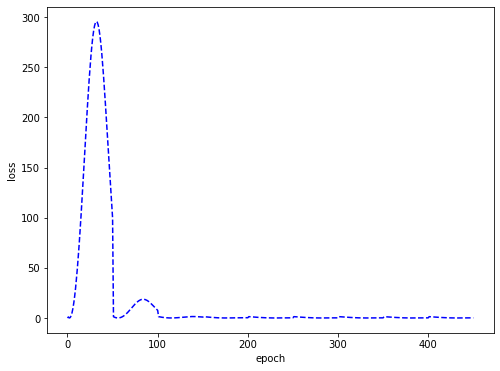

In [31]:
plt.figure(figsize = (8,6))
plt.plot(Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

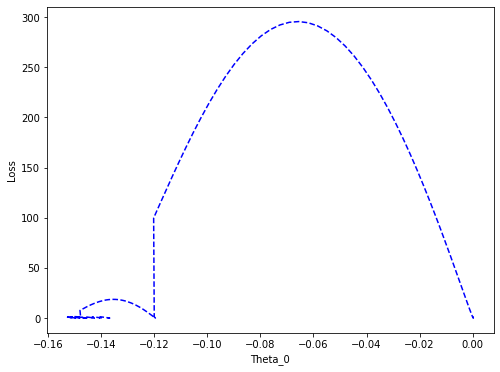

In [32]:
plt.figure(figsize = (8,6))
plt.plot(Theta_0, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.show()

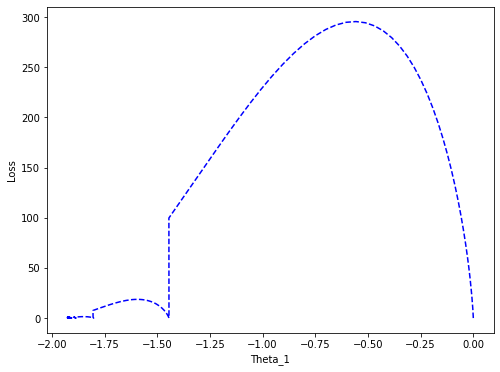

In [33]:
plt.figure(figsize = (8,6))
plt.plot(Theta_1, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.show()

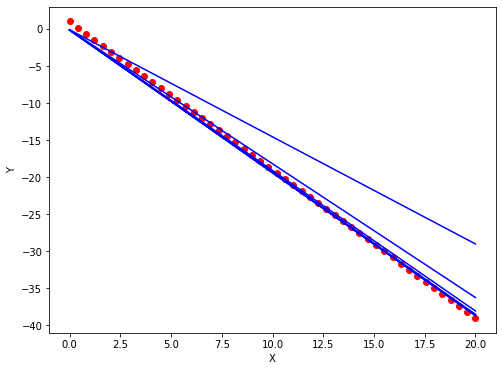

In [34]:
# Plotting all the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
for h_theta in H_theta:
    plt.plot(X, h_theta, color='blue',markerfacecolor='red',
         markersize=10)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

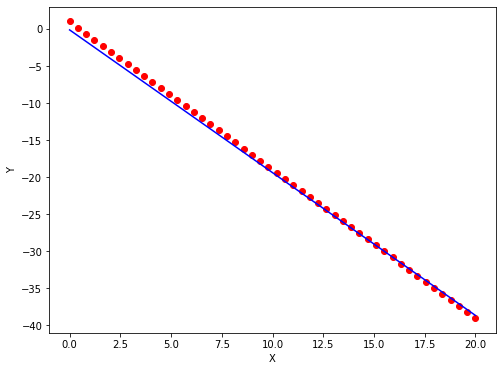

In [35]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
plt.plot(X, H_theta[-1], color='blue',markerfacecolor='red',
         markersize=15)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Shuffling

In [62]:
c = list(zip(X, y))
random.shuffle(c)
X_shuffle, y_shuffle = zip(*c)
X_shuffle = np.array(X_shuffle)
y_shuffle = np.array(y_shuffle)
Theta_0, Theta_1, Loss, H_theta, theta0, theta1 = GradientDes_Stoch(X_shuffle, y_shuffle, 0.0001, 400)
print(Loss[-1])

iteration  5
0.9862013131587214


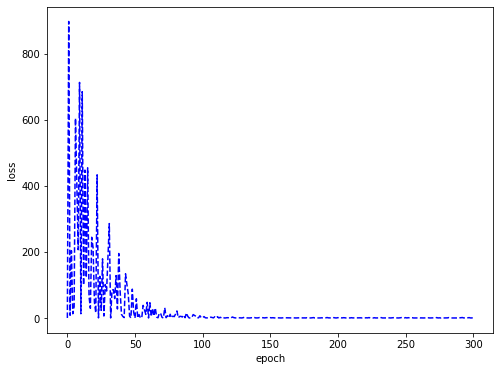

In [63]:
plt.figure(figsize = (8,6))
plt.plot(Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

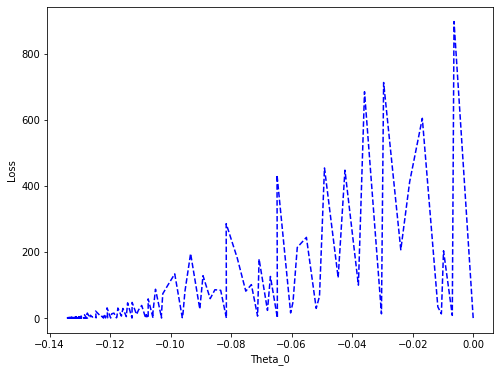

In [64]:
plt.figure(figsize = (8,6))
plt.plot(Theta_0, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.show()

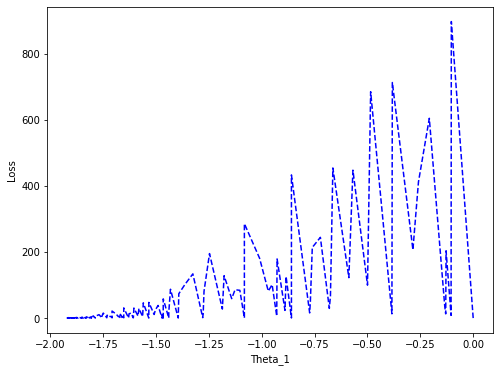

In [65]:
plt.figure(figsize = (8,6))
plt.plot(Theta_1, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.show()

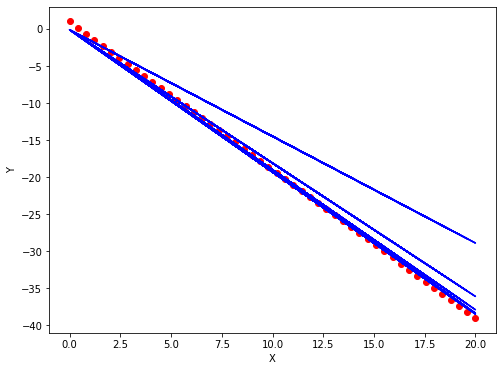

In [67]:
# Plotting all the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_shuffle, y_shuffle, marker='o', color='red')
    
for h_theta in H_theta:
    plt.plot(X_shuffle, h_theta, color='blue',markerfacecolor='red',
         markersize=10)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

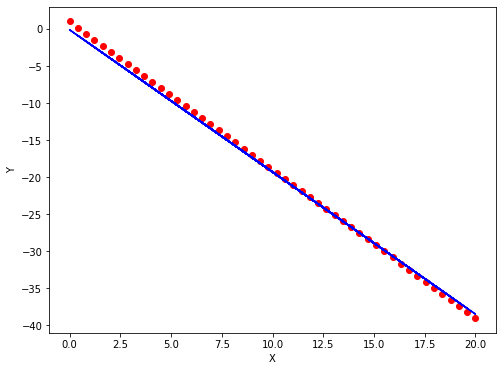

In [69]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_shuffle, y_shuffle, marker='o', color='red')
    
plt.plot(X_shuffle, H_theta[-1], color='blue',markerfacecolor='red',
         markersize=15)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()